### Import's

In [17]:
import pandas as pd
import statistics
from collections import Counter
import matplotlib.pyplot as plt
import json
import string
import glob

### Lendo arquivo csv

In [90]:
data_path = "././Dados_Para_Extracao_Das_Estatisticas/*.csv"
files_Lists = glob.glob (data_path)
print('Quantidade de planilhas:', len(files_Lists))
files_Lists 

Quantidade de planilhas: 12


['../ParticionamentoDoDataSet/PlanilhasComParticoes\\dataset_teste.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\dataset_treinamento.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_1.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_10.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_2.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_3.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_4.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_5.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_6.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_7.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_8.csv',
 '../ParticionamentoDoDataSet/PlanilhasComParticoes\\particao_9.csv']

Criando dataframes a partir das planilhas .csv que contém os dados coletados

In [81]:
dataFrames_Lists = []
def cria_DataFrames(files_Lists, dataFrames_Lists):    
    for f in files_Lists:
        csv = pd.read_csv(f) 
        csv.drop(columns = ['Unnamed: 0'], inplace=True)
        dataFrames_Lists.append(csv) 
    print('Quantidade de datasets:',len(dataFrames_Lists))
    
cria_DataFrames(files_Lists,dataFrames_Lists)

Quantidade de datasets: 12


#### Pegando as linhas referentes as pontuações, para removelas do dataset

#### Função para retirar a marcação IOB

In [82]:
#Tem a função de retirar o I-rotulo e B-rotulo para visualização crua dos rotulos
## Recebe uma lista de rotulações no formato IOB e devolve uma lista com as rotulações sem o formato IOB
def retira_IOB(lista_rotulacoes):
    dict_rotulacoes = dict({})
    for dado in lista_rotulacoes:
        if dado[0] != 'O':
            if dado[0][2:] not in dict_rotulacoes.keys():
                dict_rotulacoes.update(dict({dado[0][2:] : 0}))
            dict_rotulacoes[dado[0][2:]] += dado[1]
        else:
            dict_rotulacoes[dado[0]] = dado[1]
    return list(dict_rotulacoes.items()) ## Quantidades de vezes que cada entidade apareceu na lista original
## Função para contabilizar a quantidade de vezes que a entidade aparece na lista com as rotulações em formato IOB
def contabiliza_rotulos(lista_rotulacoes):
    dict_rotulacoes = dict({})
    for dado in lista_rotulacoes:
        if dado[0][:2] == 'B-' and dado[0] != 'O':
            if dado[0][2:] not in dict_rotulacoes.keys():
                dict_rotulacoes.update(dict({dado[0][2:] : 0}))
            dict_rotulacoes[dado[0][2:]] += dado[1]
        elif dado[0] == 'O':
            dict_rotulacoes[dado[0]] = dado[1]
    return list(dict_rotulacoes.items()) 

## Preparando os dados para pegar a quantidade de tokens por setença
def func_lista_tokens_por_sentenca(df_original):
    lista_tokens_por_sentenca = list(df_original.groupby(by="Sentenca")["Palavras"].count()) ## Agrupa as sentenças, e contabiliza quantos tokens tem por setença e transforma essa contagem em lista
    return lista_tokens_por_sentenca
#lista_tokens_por_sentenca

## Pegando informações de token por instância
def func_lista_tokens_por_inst(df_original):
    lista_tokens_por_inst = list(df_original.groupby(by='Documento')['Palavras'].count())
    return lista_tokens_por_inst
#lista_tokens_por_inst

## Pegando informações de sentenças por instância
lista_sentencas_por_inst = []
def func_lista_sentencas_por_inst(df_original):
    for dado in df_original.groupby(by='Documento')['Sentenca']:
        lista_sentencas_por_inst.append(len(Counter(list(dado[1])).keys()))
    return lista_sentencas_por_inst
#lista_sentencas_por_inst

## Preparando para pegar as quantidades de rotulações existente em todo dataset, a variavel guarda o total de rotulações por token em todo o dataset
def func_lista_qtdRotulacoes_IOB_por_token(df_original):
    lista_qtdRotulacoes_IOB_por_token = [[x[0], x[1]["Palavras"].count()] for x in df_original.groupby(by="Rotulo")] ## Agrupa por rotulação e calcucula quantos tokens tem por rotulação
    return lista_qtdRotulacoes_IOB_por_token
## A varivel guarda o total de rotulações por token em todo data set sem o formato IOB
def func_lista_qtdRotulacoes_por_token(df_original):
    lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(df_original)
    lista_qtdRotulacoes_por_token = retira_IOB(lista_qtdRotulacoes_IOB_por_token)
    return lista_qtdRotulacoes_por_token
## A variavel guarda apenas as quantidade de categoria de entidades rotuladas em todo o dataset
def func_lista_qtdRotulacoes(df_original):
    lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(df_original)
    lista_qtdRotulacoes = contabiliza_rotulos(func_lista_qtdRotulacoes_IOB_por_token(df_original))
    return lista_qtdRotulacoes

## Preparando para pegar rotulações por sentença de todo dataset
def func_lista_rotulos_por_sentenca_IOB_por_token(df_original):
    lista_rotulos_por_sentenca_IOB_por_token = []
    for dado in df_original.groupby(by="Sentenca"):
        lista_rotulos_por_sentenca_IOB_por_token.append([dado[0], list(Counter(list(dado[1]["Rotulo"])).items())])
    return lista_rotulos_por_sentenca_IOB_por_token  
## Cria uma versão da lista sem os marcadores do formato IOB
def func_lista_rotulos_por_sentenca_por_token(df_original):
    lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(df_original)
    lista_rotulos_por_sentenca_por_token = []
    for sentenca in lista_rotulos_por_sentenca_IOB_por_token:
        lista_rotulos_por_sentenca_por_token.append([sentenca[0], retira_IOB(sentenca[1])])
    return lista_rotulos_por_sentenca_por_token
## Extrai a quantidade de categoria de entidades rotuladas em cada sentença de todo o dataset
def func_lista_rotulos_por_sentenca(df_original):
    lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(df_original)
    lista_rotulos_por_sentenca = []
    for sentenca in lista_rotulos_por_sentenca_IOB_por_token:
        lista_rotulos_por_sentenca.append([sentenca[0], contabiliza_rotulos(sentenca[1])])
    return lista_rotulos_por_sentenca

## Preparando para pegar rotulações por instância de todo dataset
def func_lista_rotulacoes_por_inst_IOB_por_token(df_original):
    lista_rotulacoes_por_inst_IOB_por_token = []
    for dado in df_original.groupby(by="Documento"):
        lista_rotulacoes_por_inst_IOB_por_token.append([dado[0], list(Counter(list(dado[1]["Rotulo"])).items())])
    return lista_rotulacoes_por_inst_IOB_por_token
## Preparando para extrair rotulações por instância sem IOB
def func_lista_rotulacoes_por_inst_por_token(df_original):
    lista_rotulacoes_por_inst_IOB_por_token = func_lista_rotulacoes_por_inst_IOB_por_token(df_original)
    lista_rotulacoes_por_inst_por_token = []
    for instancia in lista_rotulacoes_por_inst_IOB_por_token:
        lista_rotulacoes_por_inst_por_token.append([instancia[0], retira_IOB(instancia[1])])
    return lista_rotulacoes_por_inst_por_token
## Extrai a quantidade de categoria de entidades rotuladas em cada instância
def func_lista_rotulacoes_por_inst(df_original):
    lista_rotulacoes_por_inst_IOB_por_token = func_lista_rotulacoes_por_inst_IOB_por_token(df_original)
    lista_rotulacoes_por_inst = []
    for instancia in lista_rotulacoes_por_inst_IOB_por_token:
        lista_rotulacoes_por_inst.append([instancia[0], contabiliza_rotulos(instancia[1])])
    return lista_rotulacoes_por_inst

## Preparando para pegar rotulações por token
def func_lista_rotulacoes_por_tokens_IOB(df_original):
    lista_rotulacoes_por_tokens_IOB = []
    for dado in df_original.groupby(by="Palavras"):
        lista_rotulacoes_por_tokens_IOB.append([dado[0], list(Counter(list(dado[1]["Rotulo"])).items())])
    return lista_rotulacoes_por_tokens_IOB
## Preparando para extrair rotulações por token sem IOB
def func_lista_rotulacoes_por_tokens(df_original):
    lista_rotulacoes_por_tokens_IOB = func_lista_rotulacoes_por_tokens_IOB(df_original)
    lista_rotulacoes_por_tokens = []
    for token in lista_rotulacoes_por_tokens_IOB:
        lista_rotulacoes_por_tokens.append([token[0], retira_IOB(token[1])])
    return lista_rotulacoes_por_tokens

#### Aplicando as funções aos datasets

Partição 1

In [86]:
lista_tokens_por_sentenca=func_lista_tokens_por_sentenca(dataFrames_Lists[0])
lista_tokens_por_inst=func_lista_tokens_por_inst(dataFrames_Lists[0])
lista_sentencas_por_inst = func_lista_sentencas_por_inst(dataFrames_Lists[0])
lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(dataFrames_Lists[0])
lista_qtdRotulacoes_por_token=func_lista_qtdRotulacoes_por_token(dataFrames_Lists[0])
lista_qtdRotulacoes=func_lista_qtdRotulacoes(dataFrames_Lists[0])
lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(dataFrames_Lists[0])
lista_rotulos_por_sentenca=func_lista_rotulos_por_sentenca(dataFrames_Lists[0])
lista_rotulacoes_por_inst_IOB_por_token=func_lista_rotulacoes_por_inst_IOB_por_token(dataFrames_Lists[0])
lista_rotulacoes_por_inst_por_token=func_lista_rotulacoes_por_inst_por_token(dataFrames_Lists[0])
lista_rotulacoes_por_inst=func_lista_rotulacoes_por_inst(dataFrames_Lists[0])
lista_rotulacoes_por_tokens_IOB=func_lista_rotulacoes_por_tokens_IOB(dataFrames_Lists[0])
lista_rotulacoes_por_tokens=func_lista_rotulacoes_por_tokens(dataFrames_Lists[0])

In [110]:
lista_tokens_por_sentenca=func_lista_tokens_por_sentenca(dataFrames_Lists[1])
lista_tokens_por_inst=func_lista_tokens_por_inst(dataFrames_Lists[1])
lista_sentencas_por_inst = func_lista_sentencas_por_inst(dataFrames_Lists[1])
lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(dataFrames_Lists[1])
lista_qtdRotulacoes_por_token=func_lista_qtdRotulacoes_por_token(dataFrames_Lists[1])
lista_qtdRotulacoes=func_lista_qtdRotulacoes(dataFrames_Lists[1])
lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(dataFrames_Lists[1])
lista_rotulos_por_sentenca=func_lista_rotulos_por_sentenca(dataFrames_Lists[1])
lista_rotulacoes_por_inst_IOB_por_token=func_lista_rotulacoes_por_inst_IOB_por_token(dataFrames_Lists[1])
lista_rotulacoes_por_inst_por_token=func_lista_rotulacoes_por_inst_por_token(dataFrames_Lists[1])
lista_rotulacoes_por_inst=func_lista_rotulacoes_por_inst(dataFrames_Lists[1])
lista_rotulacoes_por_tokens_IOB=func_lista_rotulacoes_por_tokens_IOB(dataFrames_Lists[1])
lista_rotulacoes_por_tokens=func_lista_rotulacoes_por_tokens(dataFrames_Lists[1])

In [111]:
lista_tokens_por_sentenca=func_lista_tokens_por_sentenca(dataFrames_Lists[2])
lista_tokens_por_inst=func_lista_tokens_por_inst(dataFrames_Lists[2])
lista_sentencas_por_inst = func_lista_sentencas_por_inst(dataFrames_Lists[2])
lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(dataFrames_Lists[2])
lista_qtdRotulacoes_por_token=func_lista_qtdRotulacoes_por_token(dataFrames_Lists[2])
lista_qtdRotulacoes=func_lista_qtdRotulacoes(dataFrames_Lists[2])
lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(dataFrames_Lists[2])
lista_rotulos_por_sentenca=func_lista_rotulos_por_sentenca(dataFrames_Lists[2])
lista_rotulacoes_por_inst_IOB_por_token=func_lista_rotulacoes_por_inst_IOB_por_token(dataFrames_Lists[2])
lista_rotulacoes_por_inst_por_token=func_lista_rotulacoes_por_inst_por_token(dataFrames_Lists[2])
lista_rotulacoes_por_inst=func_lista_rotulacoes_por_inst(dataFrames_Lists[2])
lista_rotulacoes_por_tokens_IOB=func_lista_rotulacoes_por_tokens_IOB(dataFrames_Lists[2])
lista_rotulacoes_por_tokens=func_lista_rotulacoes_por_tokens(dataFrames_Lists[2])

In [115]:
lista_tokens_por_sentenca=func_lista_tokens_por_sentenca(dataFrames_Lists[3])
lista_tokens_por_inst=func_lista_tokens_por_inst(dataFrames_Lists[3])
lista_sentencas_por_inst = func_lista_sentencas_por_inst(dataFrames_Lists[3])
lista_qtdRotulacoes_IOB_por_token=func_lista_qtdRotulacoes_IOB_por_token(dataFrames_Lists[3])
lista_qtdRotulacoes_por_token=func_lista_qtdRotulacoes_por_token(dataFrames_Lists[3])
lista_qtdRotulacoes=func_lista_qtdRotulacoes(dataFrames_Lists[3])
lista_rotulos_por_sentenca_IOB_por_token = func_lista_rotulos_por_sentenca_IOB_por_token(dataFrames_Lists[3])
lista_rotulos_por_sentenca=func_lista_rotulos_por_sentenca(dataFrames_Lists[3])
lista_rotulacoes_por_inst_IOB_por_token=func_lista_rotulacoes_por_inst_IOB_por_token(dataFrames_Lists[3])
lista_rotulacoes_por_inst_por_token=func_lista_rotulacoes_por_inst_por_token(dataFrames_Lists[3])
lista_rotulacoes_por_inst=func_lista_rotulacoes_por_inst(dataFrames_Lists[3])
lista_rotulacoes_por_tokens_IOB=func_lista_rotulacoes_por_tokens_IOB(dataFrames_Lists[3])
lista_rotulacoes_por_tokens=func_lista_rotulacoes_por_tokens(dataFrames_Lists[3])

Visualizando os dados em formato de listas (totais)

In [116]:
#print(lista_tokens_por_sentenca) ## Tokens por Sentença
#print(lista_tokens_por_inst) ## Tokens por Documento
#print(lista_sentencas_por_inst) ## Setenças por Documento

## Estatísticas

Dados Demográficos do Dataset Pré-Processado

In [117]:
print("-----QUANTIDADES-----")
print("Quantidade de documentos: " + str(len(lista_tokens_por_inst)))
print("Quantidade de sentenças: " + str(len(lista_tokens_por_sentenca)))
print("Quantidade de tokens: " + str(len(dataFrames_Lists[3])))

-----QUANTIDADES-----
Quantidade de documentos: 100
Quantidade de sentenças: 1432
Quantidade de tokens: 18838


#### Gráficos com informações sobre as Categorias

Quantidade de rotulações por categoria sem IOB

In [118]:
lista_qtdRotulacoes = sorted(lista_qtdRotulacoes, key=lambda i: i[-1])
lista_qtdRotulacoes

[('CARACTERISTICA_SENSORIAL_CONSISTÊNCIA', 25),
 ('EQUIPAMENTO_DESTILACAO', 35),
 ('CARACTERISTICA_SENSORIAL_COR', 52),
 ('NOME_PESSOA', 78),
 ('PRECO', 92),
 ('CARACTERISTICA_SENSORIAL_SABOR', 99),
 ('RECIPIENTE_ARMAZENAMENTO', 101),
 ('CARACTERISTICA_SENSORIAL_AROMA', 110),
 ('NOME_ORGANIZACAO', 116),
 ('GRADUACAO_ALCOOLICA', 117),
 ('TEMPO_ARMAZENAMENTO', 121),
 ('CLASSIFICACAO_BEBIDA', 134),
 ('TEMPO', 153),
 ('VOLUME', 251),
 ('TIPO_MADEIRA', 260),
 ('NOME_BEBIDA', 349),
 ('NOME_LOCAL', 448),
 ('O', 14751)]

Total de tokens não rotulados: 41711


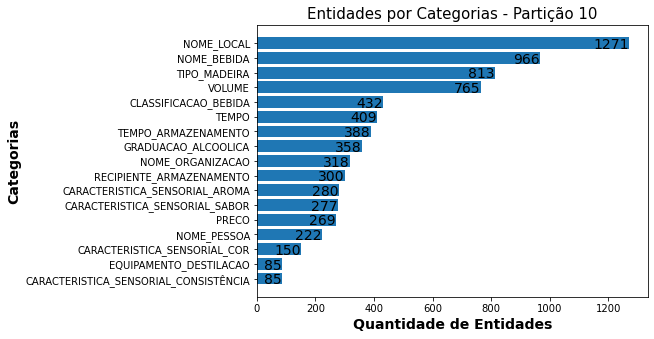

In [79]:
import os        
lista_aux = [x for x in lista_qtdRotulacoes if x[0] != 'O']
valor_O = [x[1] for x in lista_qtdRotulacoes if x[0] == 'O']
print("Total de tokens não rotulados: " + str(valor_O[0]))

grupos = [x[0] for x in lista_aux]
valores = [x[1] for x in lista_aux]
#plt.subplots(1,1, figsize=(7,5))
plt.figure(figsize = (7,5))
plt.barh(grupos, valores)


for index, item in enumerate(valores):
    plt.text(valores[index],index,valores[index],  va="center_baseline",ha="right",fontsize=14)
    
plt.title('Entidades por Categorias - Partição 10',fontsize=15.0)
plt.xlabel('Quantidade de Entidades', fontweight='bold', fontsize=14.0)
plt.ylabel('Categorias', fontweight='bold', fontsize=14.0)
plt.savefig(os.path.join('Partição_10.png'), dpi=300, format='png', bbox_inches='tight') 
plt.show()

### TOKENS POR SENTENÇA

In [11]:
print("-----QUANTIDADES-----")
print("Quantidade de Documentos: " + str(len(lista_tokens_por_sentenca)))
print("Quantidade de tokens: " + str(sum(lista_tokens_por_sentenca)))
print("Quantidade máxima de tokens em uma sentença: " + str(max(lista_tokens_por_sentenca)))
print("Quantidade mínima de tokens em uma sentença: " + str(min(lista_tokens_por_sentenca)))
print("-----Médias-----")
print("Média aritmética dos tokens por sentença: " + str(statistics.mean(lista_tokens_por_sentenca)))
print("Média geométrica dos tokens por sentença: " + str(statistics.geometric_mean(lista_tokens_por_sentenca)))
print("Média harmônica dos tokens por sentença: " + str(statistics.harmonic_mean(lista_tokens_por_sentenca)))
print("-----Medianas-----")
print("Mediana dos tokens por setença: " + str(statistics.median(lista_tokens_por_sentenca)))
print("Mediana inferior dos tokens por setença: " + str(statistics.median_low(lista_tokens_por_sentenca)))
print("Mediana superior dos tokens por setença: " + str(statistics.median_high(lista_tokens_por_sentenca)))
print("Mediana, ou o 50º percentil dos dados agrupados dos tokens por setença: " + str(statistics.median_grouped(lista_tokens_por_sentenca)))
print("-----Moda-----")
print("Moda dos tokens por sentença: " + str(statistics.mode(lista_tokens_por_sentenca)))
print("-----Desvio Padrão-----")
print("Desvio padrão populacional dos tokens por sentença: " + str(statistics.pstdev(lista_tokens_por_sentenca)))
print("Desvio padrão amostral dos tokens por sentença: " + str(statistics.stdev(lista_tokens_por_sentenca)))
print("-----Variância-----")
print("Variância populacional dos tokens por sentença: " + str(statistics.pvariance(lista_tokens_por_sentenca)))
print("Variância amostral dos tokens por sentença: " + str(statistics.variance(lista_tokens_por_sentenca)))
print("-----Quantiles-----")
print("Quantiles dos tokens por sentença: " + str(statistics.quantiles(lista_tokens_por_sentenca)))

-----QUANTIDADES-----
Quantidade de Documentos: 4174
Quantidade de tokens: 53639
Quantidade máxima de tokens em uma sentença: 125
Quantidade mínima de tokens em uma sentença: 1
-----Médias-----
Média aritmética dos tokens por sentença: 12.850742692860566
Média geométrica dos tokens por sentença: 9.08640422578467
Média harmônica dos tokens por sentença: 6.555102316848766
-----Medianas-----
Mediana dos tokens por setença: 8.0
Mediana inferior dos tokens por setença: 8
Mediana superior dos tokens por setença: 8
Mediana, ou o 50º percentil dos dados agrupados dos tokens por setença: 8.369158878504672
-----Moda-----
Moda dos tokens por sentença: 4
-----Desvio Padrão-----
Desvio padrão populacional dos tokens por sentença: 11.806071674755792
Desvio padrão amostral dos tokens por sentença: 11.807486168461791
-----Variância-----
Variância populacional dos tokens por sentença: 139.38332838947105
Variância amostral dos tokens por sentença: 139.41672961841653
-----Quantiles-----
Quantiles dos tok

#### Gráficos

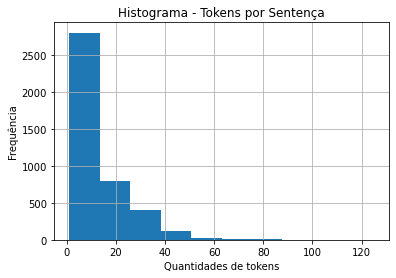

In [12]:
plt.hist(lista_tokens_por_sentenca)
plt.xlabel('Quantidades de tokens')
plt.ylabel('Frequência')
plt.title('Histograma - Tokens por Sentença')
plt.grid()
plt.show()

### TOKENS POR DOCUMENTO

In [13]:
print("-----QUANTIDADES-----")
print("Quantidade de Documentos: " + str(len(lista_tokens_por_inst)))
print("Quantidade de tokens: " + str(sum(lista_tokens_por_inst)))
print("Quantidade máxima de tokens em uma documento: " + str(max(lista_tokens_por_inst)))
print("Quantidade mínima de tokens em uma documento: " + str(min(lista_tokens_por_inst)))
print("-----Médias-----")
print("Média aritmética dos tokens por documento: " + str(statistics.mean(lista_tokens_por_inst)))
print("Média geométrica dos tokens por documento: " + str(statistics.geometric_mean(lista_tokens_por_inst)))
print("Média harmônica dos tokens por documento: " + str(statistics.harmonic_mean(lista_tokens_por_inst)))
print("-----Medianas-----")
print("Mediana dos tokens por documento: " + str(statistics.median(lista_tokens_por_inst)))
print("Mediana inferior dos tokens por documento: " + str(statistics.median_low(lista_tokens_por_inst)))
print("Mediana superior dos tokens por documento: " + str(statistics.median_high(lista_tokens_por_inst)))
print("Mediana, ou o 50º percentil dos dados agrupados dos tokens por documento: " + str(statistics.median_grouped(lista_tokens_por_inst)))
print("-----Moda-----")
print("Moda dos tokens por documento: " + str(statistics.mode(lista_tokens_por_inst)))
print("-----Desvio Padrão-----")
print("Desvio padrão populacional dos tokens por documento: " + str(statistics.pstdev(lista_tokens_por_inst)))
print("Desvio padrão amostral dos tokens por documento: " + str(statistics.stdev(lista_tokens_por_inst)))
print("-----Variância-----")
print("Variância populacional dos tokens por documento: " + str(statistics.pvariance(lista_tokens_por_inst)))
print("Variância amostral dos tokens por documento: " + str(statistics.variance(lista_tokens_por_inst)))
print("-----Quantiles-----")
print("Quantiles dos tokens por documento: " + str(statistics.quantiles(lista_tokens_por_inst)))

-----QUANTIDADES-----
Quantidade de Documentos: 300
Quantidade de tokens: 53639
Quantidade máxima de tokens em uma documento: 775
Quantidade mínima de tokens em uma documento: 18
-----Médias-----
Média aritmética dos tokens por documento: 178.79666666666665
Média geométrica dos tokens por documento: 141.5135699360163
Média harmônica dos tokens por documento: 109.52250519991476
-----Medianas-----
Mediana dos tokens por documento: 144.0
Mediana inferior dos tokens por documento: 144
Mediana superior dos tokens por documento: 144
Mediana, ou o 50º percentil dos dados agrupados dos tokens por documento: 144.0
-----Moda-----
Moda dos tokens por documento: 168
-----Desvio Padrão-----
Desvio padrão populacional dos tokens por documento: 127.44408704299397
Desvio padrão amostral dos tokens por documento: 127.65702635112412
-----Variância-----
Variância populacional dos tokens por documento: 16241.995322222223
Variância amostral dos tokens por documento: 16296.316376811596
-----Quantiles-----
Q

#### Gráficos

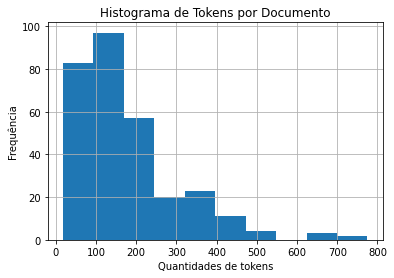

In [14]:
plt.hist(lista_tokens_por_inst)
plt.xlabel('Quantidades de tokens')
plt.ylabel('Frequência')
plt.title('Histograma de Tokens por Documento')
plt.grid()
plt.show()

### SENTENÇAS POR DOCUMENTO

In [15]:
print("-----QUANTIDADES-----")
print("Quantidade de documentos: " + str(len(lista_sentencas_por_inst)))
print("Quantidade de sentenças: " + str(sum(lista_sentencas_por_inst)))
print("Quantidade máxima de sentenças em uma documento: " + str(max(lista_sentencas_por_inst)))
print("Quantidade mínima de sentenças em uma documento: " + str(min(lista_sentencas_por_inst)))
print("-----Médias-----")
print("Média aritmética dos tokens por documento: " + str(statistics.mean(lista_sentencas_por_inst)))
print("Média geométrica dos tokens por documento: " + str(statistics.geometric_mean(lista_sentencas_por_inst)))
print("Média harmônica dos tokens por documento: " + str(statistics.harmonic_mean(lista_sentencas_por_inst)))
print("-----Medianas-----")
print("Mediana dos tokens por documento: " + str(statistics.median(lista_sentencas_por_inst)))
print("Mediana inferior dos tokens por documento: " + str(statistics.median_low(lista_sentencas_por_inst)))
print("Mediana superior dos tokens por documento: " + str(statistics.median_high(lista_sentencas_por_inst)))
print("Mediana, ou o 50º percentil dos dados agrupados dos tokens por documento: " + str(statistics.median_grouped(lista_sentencas_por_inst)))
print("-----Moda-----")
print("Moda dos tokens por documento: " + str(statistics.mode(lista_sentencas_por_inst)))
print("-----Desvio Padrão-----")
print("Desvio padrão populacional dos tokens por documento: " + str(statistics.pstdev(lista_sentencas_por_inst)))
print("Desvio padrão amostral dos tokens por documento: " + str(statistics.stdev(lista_sentencas_por_inst)))
print("-----Variância-----")
print("Variância populacional dos tokens por documento: " + str(statistics.pvariance(lista_sentencas_por_inst)))
print("Variância amostral dos tokens por documento: " + str(statistics.variance(lista_sentencas_por_inst)))
print("-----Quantiles-----")
print("Quantiles dos tokens por documento: " + str(statistics.quantiles(lista_sentencas_por_inst)))

-----QUANTIDADES-----
Quantidade de documentos: 300
Quantidade de sentenças: 4174
Quantidade máxima de sentenças em uma documento: 42
Quantidade mínima de sentenças em uma documento: 3
-----Médias-----
Média aritmética dos tokens por documento: 13.913333333333334
Média geométrica dos tokens por documento: 12.032900974727818
Média harmônica dos tokens por documento: 10.319506170726394
-----Medianas-----
Mediana dos tokens por documento: 12.0
Mediana inferior dos tokens por documento: 12
Mediana superior dos tokens por documento: 12
Mediana, ou o 50º percentil dos dados agrupados dos tokens por documento: 11.85
-----Moda-----
Moda dos tokens por documento: 9
-----Desvio Padrão-----
Desvio padrão populacional dos tokens por documento: 7.470775655103618
Desvio padrão amostral dos tokens por documento: 7.483258162814286
-----Variância-----
Variância populacional dos tokens por documento: 55.81248888888889
Variância amostral dos tokens por documento: 55.999152731326646
-----Quantiles-----
Qu

#### Gráficos

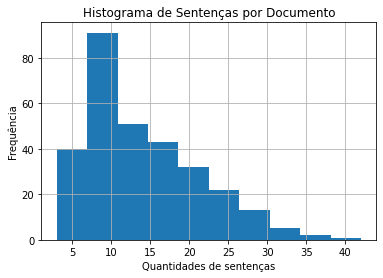

In [16]:
plt.hist(lista_sentencas_por_inst)
plt.xlabel('Quantidades de sentenças')
plt.ylabel('Frequência')
plt.title('Histograma de Sentenças por Documento')
plt.grid()
plt.show()